### clone yolov5 repo
###text detection model training and testing 

clone git repo for yolov5 model

In [1]:
 ! git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 13003, done.
remote: Total 13003 (delta 0), reused 0 (delta 0), pack-reused 13003
Receiving objects: 100% (13003/13003), 11.91 MiB | 33.13 MiB/s, done.
Resolving deltas: 100% (9031/9031), done.


install all the requirement through requirement.txt file in the repo cloned

In [2]:
!pip install -r /content/yolov5/requirements.txt

     |████████████████████████████████| 596 kB 8.0 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [3]:
!pip install torch==1.6.0+cpu torchvision==0.7.0+cpu -f https://download.pytorch.org/whl/torch_stable.html


Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 154.6 MB 57 kB/s 
     |████████████████████████████████| 5.1 MB 16.0 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.10.0+cu111
    Uninstalling torch-1.10.0+cu111:
      Successfully uninstalled torch-1.10.0+cu111
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.11.1+cu111
    Uninstalling torchvision-0.11.1+cu111:
      Successfully uninstalled torchvision-0.11.1+cu111
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.11.0 requires torch==1.10.0, but you have torch 1.6.0+cpu which is incompatible.
torchaudio 0.10.0+cu111 requires torch==1.10.0, but you have torch 1.6.0+cpu which is incompatible.


convert json files in annotations to txt files

In [10]:
class_names = {'question' : 0,'answer':1,'header':2,'other':3}

convert the json files into yolo format and the bounding box coordinates in the annotations as yolo format of x,y,w,h
also normalize it between 0-1 as yolov5 uses normalized values

In [11]:
import os
import json
import cv2
def main(json_dir,out_dir,image_dir):
    #  Read JSON file data
    for filename in os.listdir(json_dir):
      if filename.endswith(".json"):
        start = filename.split('.')[0]
        dir = os.path.join(json_dir,filename)
        with open(dir, 'r') as load_f:
            content = json.load(load_f)
            # print(content['form'])
            img_dir = os.path.join(image_dir,start+'.png')
            img = cv2.imread(img_dir,0)
            height = img.shape[0]
            width = img.shape[1]
            for t in content['form']: 
                filenm = out_dir + start + '.txt'
                if os.path.exists(filenm):
                    #  Calculate the relative x, y coordinate, W, H value of the center point required for YOLO data format
                    # xmin,ymin,xmax,ymax
                    x = (t['box'][0]+t['box'][2])/2
                    y = (t['box'][1]+t['box'][3])/2
                    w = t['box'][2]-t['box'][0]
                    h = t['box'][3]-t['box'][1]
                    x = x/width
                    y = y/height
                    w = w/width
                    h = h/height
 
                    with open(filenm, mode="r+", encoding="utf-8") as fp:
                      file_str = str(class_names[t['label']]) + ' ' + str(round(x, 6)) + ' ' + str(round(y, 6)) + ' ' + str(round(w, 6)) + \
                                ' ' + str(round(h, 6))
                      line_data = fp.readlines()

                      if len(line_data) != 0:
                          fp.write('\n' + file_str)
                      else:
                          fp.write(file_str)

                #  Create a file without existence
                else:
                    with open(filenm, mode="w", encoding="utf-8") as fp:
                      fp.close()


In [12]:
json_dir = '/content/drive/MyDrive/prodigal/dataset/training_data/annotations/'  # JSON file path
out_dir = '/content/drive/MyDrive/prodigal/dataset/training_data/labels/'  #  Output TXT file path
image_dir = '/content/drive/MyDrive/prodigal/dataset/training_data/images'
main(json_dir,out_dir,image_dir)

In [13]:
json_dir = '/content/drive/MyDrive/prodigal/dataset/testing_data/annotations/'  # JSON file path
out_dir = '/content/drive/MyDrive/prodigal/dataset/testing_data/labels/'  # Output TXT file path
image_dir = '/content/drive/MyDrive/prodigal/dataset/testing_data/images'
main(json_dir,out_dir,image_dir)

convert images from png to jpg

In [ ]:
import os
from PIL import Image
def convert_png_to_jpg(path):
  for filename in os.listdir(path):
      if filename.endswith(".png"):
        im1 = Image.open(os.path.join(path, filename))
        start = filename.split('.')[0]
        im1.save(os.path.join(path, start+'.jpg'))
        os.remove(os.path.join(path, filename))
      else:
          continue

In [ ]:
convert_png_to_jpg('/content/drive/MyDrive/prodigal/dataset/training_data/images')

In [ ]:
convert_png_to_jpg('/content/drive/MyDrive/prodigal/dataset/testing_data/images')

now modify the yaml file present in the data directory of yolov5. Add your own train test and val path to the images.
create a data.yaml file with nc=4 as in our case.Also update the yolo5s.yaml file with nc=4 if want to train your own model


here i have used the yolo5s.pt pre trained weights from the yolov5 releases to train my model. I have trained my model for 1000 epochs which gave me approx 60% accuracy. there is a scope for improvement if the dataset is increased

In [78]:
! python /content/yolov5/train.py --img 416 --batch 12 --epochs 1000 --data /content/yolov5/data/data.yaml  --weights /content/drive/MyDrive/prodigal/yolov5s.pt 


train: weights=/content/drive/MyDrive/prodigal/yolov5s.pt, cfg=, data=/content/yolov5/data/data.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=1000, batch_size=12, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-161-ge54e758 torch 1.11.0+cu102 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_g

use the best weights saved for testing. run the detect.py file in yolov5 for the testing images

I have modified the detect.py file to save the bounding box text into my testing_data/results directory which i will be further using for ocr.

Added the below code in detect.py below line 172


                    save_obj = True
                    if save_obj:
                        for k in range(len(det)):
                            x,y,w,h=int(xyxy[0]), int(xyxy[1]), int(xyxy[2] - xyxy[0]), int(xyxy[3] - xyxy[1])                   
                            img_ = im0.astype(np.uint8)
                            crop_img=img_[y:y+ h, x:x + w]                             
                            filename=p.name
                            filepath=os.path.join(r'test_images/results/', filename)
                            print(filepath)
                            cv2.imwrite(filepath, crop_img) 
                        else:
                            print("There is no detected object")

In [79]:
! python /content/yolov5/detect.py --img 416 --source /content/drive/MyDrive/prodigal/dataset/testing_data/images --weights /content/yolov5/runs/train/exp6/weights/best.pt --conf-thres 0.5


Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/prodigal/dataset/testing_data/results/3291814768_91814769.png
/content/drive/MyDrive/prodigal/dataset/testing_data/results/3391814768_91814769.png
/content/drive/MyDrive/prodigal/dataset/testing_data/results/3491814768_91814769.png
/content/drive/MyDrive/prodigal/dataset/testing_data/results/3591814768_91814769.png
/content/drive/MyDrive/prodigal/dataset/testing_data/results/3691814768_91814769.png
/content/drive/MyDrive/prodigal/dataset/testing_data/results/3791814768_91814769.png
/content/drive/MyDrive/prodigal/dataset/testing_data/results/3891814768_91814769.png
/content/drive/MyDrive/prodigal/dataset/testing_data/results/3991814768_91814769.png
/content/drive/MyDrive/prodigal/dataset/testing_data/results/4091814768_91814769.png
/content/drive/MyDrive/prodigal/dataset/testing_data/results/4191814768_91814769.png
/content/drive/MyDrive/prodigal/dataset/testing_data/results/4291814768_91814769.png
/content/drive

In [80]:
import shutil
shutil.copytree('/content/yolov5/runs/detect/exp5','/content/drive/MyDrive/prodigal/res')

'/content/drive/MyDrive/prodigal/res'

install pytessaract for ocr

In [8]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 40 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (6,119 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

###text extraction from validation images(OCR)


create a dataframe to store text as csv

In [81]:
import pandas as pd
df= pd.DataFrame(columns=['text'])

In [82]:
df.head()

,text


we will be using pytessaract for ocr and then save the text into the dataframe. after that save that dataframe as csv for further use.

In [84]:
import os
import traceback


# importing libraries for computer vision
import numpy as np
import cv2 
import imutils
from imutils import contours
from imutils.perspective import four_point_transform
from skimage.filters import threshold_local

# importing libraries to read text from image
from PIL import Image
import pytesseract

# exploring the directory for all jpg files
for file in os.listdir("/content/drive/MyDrive/prodigal/dataset/testing_data/results"):
    if file.endswith(".png"):
        file_path = "/content/drive/MyDrive/prodigal/dataset/testing_data/results/" + str(file)
        # # reading file with cv2
        # img = cv2.imread(file_path)
        # ratio = img.shape[0]/500.0
        # original_img = img.copy()

        # # converting image into grayscale
        # gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # # blurring and finding edges of the image
        # blurred = cv2.GaussianBlur(gray, (5,5) ,0)
        # edged = cv2.Canny(gray, 75, 200)

        # # applying threshold to grayscale image
        # thresh = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)[1]

        # # finding contours
        # (cnts,_) = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        # # draw contours on image 
        # cv2.drawContours(img, cnts, -1, (240, 0, 159), 3)

        # H,W = img.shape[:2]
        # for cnt in cnts:
        #     x,y,w,h = cv2.boundingRect(cnt)
        #     if cv2.contourArea(cnt) > 100 and (0.7 < w/h < 1.3) and (W/4 < x + w//2 < W*3/4) and (H/4 < y + h//2 < H*3/4):
        #         break

        # # creating mask and performing bitwise-op
        # mask = np.zeros(img.shape[:2],np.uint8)
        # cv2.drawContours(mask, [cnt],-1, 255, -1)
        # dst = cv2.bitwise_and(img, img, mask=mask)

        # # displaying image and saving in the directory
        # gray = cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY)
        # gray = cv2.medianBlur(gray, 3)
        # gray = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
        # scanned_file_name = "/content/drive/MyDrive/prodigal/dataset/testing_data/scanned/" + str(file[:-4]) + "-Scanned.png" 
        # cv2.imwrite(scanned_file_name, dst)
        # cv2.imshow("gray.png", dst)
        # cv2.waitKey()

        # fetching text from the image and storing it into a text file
        # file_text = pytesseract.image_to_string(Image.open(scanned_file_name))
        file_text = pytesseract.image_to_string(Image.open(file_path))
        if len(file_text) > 2:
          row={'text':file_text}
          df=df.append(row,ignore_index=True)

          text_file_name = "/content/drive/MyDrive/prodigal/dataset/testing_data/scanned_txt/" + str(file[:-4]) + "-Scanned.txt" 
          with open(text_file_name, "a") as f:
              f.write(file_text + "\n")

df.to_csv('/content/drive/MyDrive/prodigal/data.csv',index=False)            
        

In [73]:
df=pd.read_csv('/content/drive/MyDrive/prodigal/data.csv')

there are some rows that contains duplicates so lets drop them

In [74]:
df=df.drop_duplicates()

reset index 

In [75]:
df.reset_index(drop=True,inplace=True)

In [78]:
df

,text
0,WHOM IT IS ADDRESSED AND MAY CONTAIN INFORMATI...
2,5 has not been a problem. New packaging is jus...
3,Kent B. Mille\n
4,mnewor i\n
5,Effective in those retail calls that we could ...
6,Jassau / 10)\n
7,Asbestos\n
8,December 9. 1999.\n
9,\n\nREPORTED\n
10,his transmission is intended for che sole use ...


In [79]:
df.shape

(37, 1)

In [80]:
print(df.iloc[0])

text    WHOM IT IS ADDRESSED AND MAY CONTAIN INFORMATI...
Name: 0, dtype: object


In [81]:
df.isnull().sum()

text    0
dtype: int64

now we use nltk library for text pre processing and vectorization

### extracted text preprocessing

import the libariries

In [82]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from sklearn import cluster

# Visualization and Analysis
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.metrics import silhouette_samples, silhouette_score
from wordcloud import WordCloud

# Map Viz
import folium
#import branca.colormap as cm
from branca.element import Figure


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


we have done stemming and replaced unnecessary words from the text also said as corpus

We will do a data engineering routine with our the saved text data so later we can make a good statistical model. In order to do so, we'll remove all words that don't contribute to the semantic meaning of the text (words that are not within the english alphabet) and keep all of the remaining words in the simplest format possible, so we can apply a function that gives weights to each word without generating any bias or outliers. To do that there are many techniques to clean up our corpus, among them we will remove the most common words (stop words) and apply stemming, a technique that reduces a word to it's root.

The methods that apply stemming and stop words removal are listed bellow. We will also define a method that removes any words with less than 2 letters or more than 21 letters to clean our corpus even more.

In [83]:

# Lets do some text cleanup
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
REMOVE_NUM = re.compile('[\d+]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
    text: a string
    return: modified initial string
    """
    # lowercase text
    text = text.lower() 

    # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) 
    
    # Remove the XXXX values
    text = text.replace('x', '') 
    
    # Remove white space
    text = REMOVE_NUM.sub('', text)

    #  delete symbols which are in BAD_SYMBOLS_RE from text
    text = BAD_SYMBOLS_RE.sub('', text) 

    # delete stopwords from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) 
    
    # removes any words composed of less than 2 or more than 21 letters
    text = ' '.join(word for word in text.split() if (len(word) >= 2 and len(word) <= 21))

    # Stemming the words
    text = ' '.join([stemmer.stem(word) for word in text.split()])
    
    return text

clean text

A section back, at the exploration of our dataset, we noticed some words containg weird characters that should be removed. By using RegEx our main processing function will remove unknown ASCII symbols, especial chars, numbers, e-mails, URLs, etc (It's a bit of a overkill, I know). It also uses the auxiliary funcitions defined above.

In [84]:
df['text']=df['text'].apply(clean_text)

Statistical Weighting of Words
Now we will apply the TF-IDF function, short for term frequency inverse document frequency, which is a numerical statistic that's intended to reflect how important a word is to a document in a corpus by giving each word in a document a score that ranges from 0 to 1.

In [85]:
# Run TF IDF Vectorizer on the text data
from sklearn.feature_extraction.text import TfidfVectorizer

# sublinear_df is set to True to use a logarithmic form for frequency
# min_df is the minimum numbers of documents a word must be present in to be kept
# norm is set to l2, to ensure all our feature vectors have a euclidian norm of 1
# ngram_range is set to (1, 2) to indicate that we want to consider both unigrams and bigrams
# stop_words is set to "english" to remove all common pronouns ("a", "the", ...) to reduce the number of noisy features
vectorizer = TfidfVectorizer(sublinear_tf= True, norm='l2', ngram_range=(1, 2), stop_words='english')
X = vectorizer.fit_transform(df['text'])
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())
tf_idf.head()

,aan,aan rete,account,account statu,ace,ace herebi,acorbotdd,add,add outsid,addenousoin,...,wiiul iti,wit,wit page,yo,yon,yon mere,york,york nv,ypodv,ypodv cele
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.10097,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0


###process the extracted text and cluster them using k-means

In [87]:
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = cluster.KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               , random_state = 1
                               , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(data)} )
        
    return kmeans_results

Silhouette Score
The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).

In [88]:
def printAvg(avg_dict):
    for avg in sorted(avg_dict.keys(), reverse=True):
        print("Avg: {}\tK:{}".format(avg.round(4), avg_dict[avg]))
        
def plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg):
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8, 6)
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title(("Silhouette analysis for K = %d" % n_clusters), fontsize=10, fontweight='bold')
    
    y_lower = 10
    sample_silhouette_values = silhouette_samples(df, kmeans_labels) # Compute the silhouette scores for each sample
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10  # Compute the new y_lower for next plot. 10 for the 0 samples
    plt.show()
    
        
def silhouette(kmeans_dict, df, plot=False):
    df = df.to_numpy()
    avg_dict = dict()
    for n_clusters, kmeans in kmeans_dict.items():      
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df, kmeans_labels) # Average Score for all Samples
        avg_dict.update( {silhouette_avg : n_clusters} )
    
        if(plot): plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg)


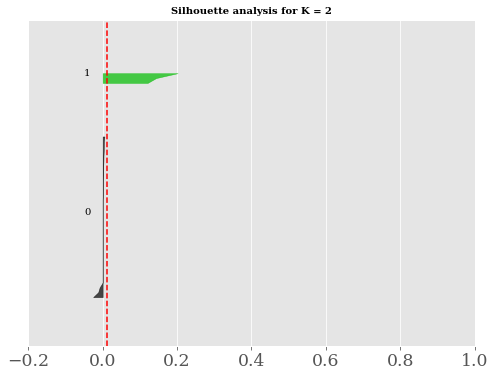

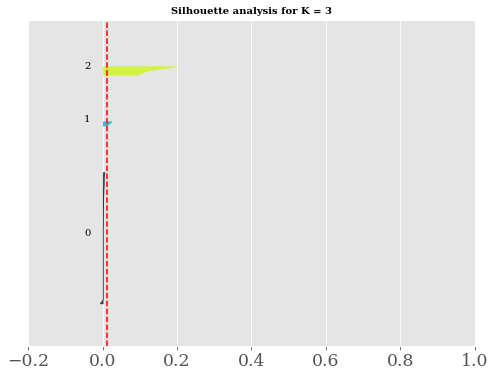

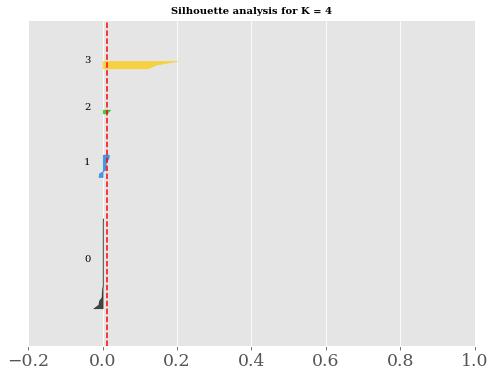

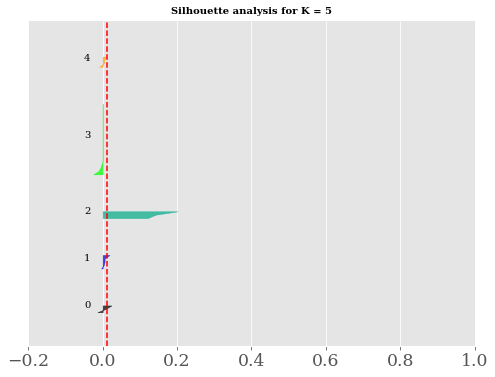

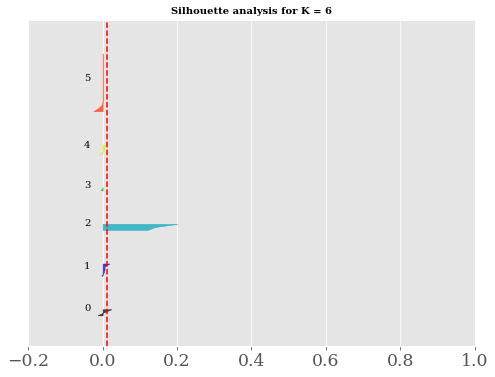

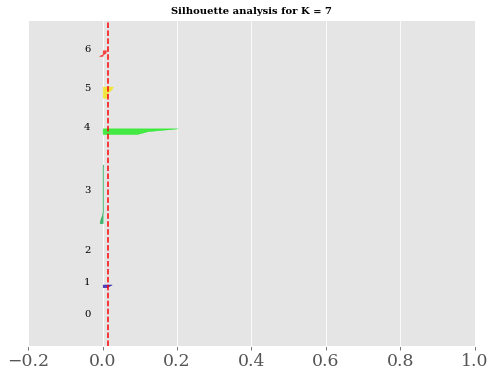

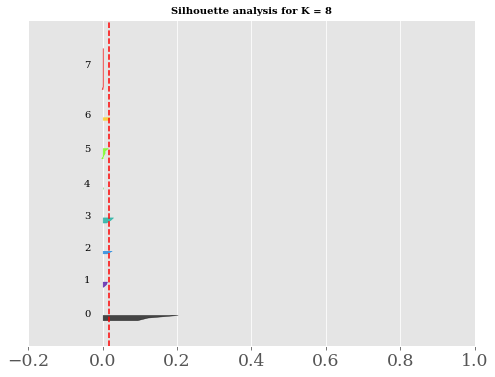

In [89]:
# Running Kmeans
k = 8
kmeans_results = run_KMeans(k, tf_idf)

# Plotting Silhouette Analysis
silhouette(kmeans_results, tf_idf, plot=True)

###Cluster Analysis
Now we can choose the best number of K and take a deeper look at each cluster. Looking at the plots above, we have some clues that when K = 5 is when the clusters are best defined. So first we will use a simple histogram to look at the most dominant words in each cluster:

In [90]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

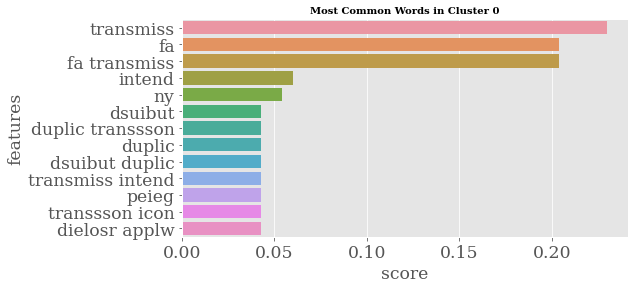

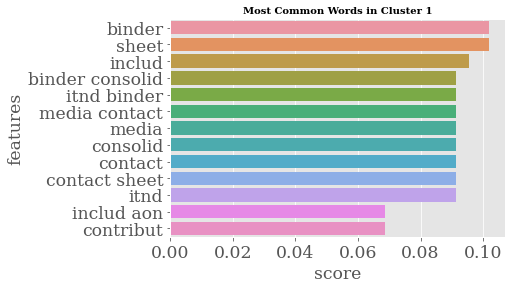

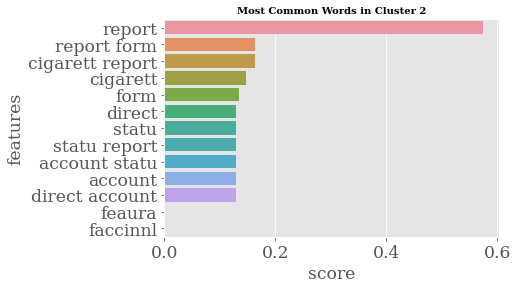

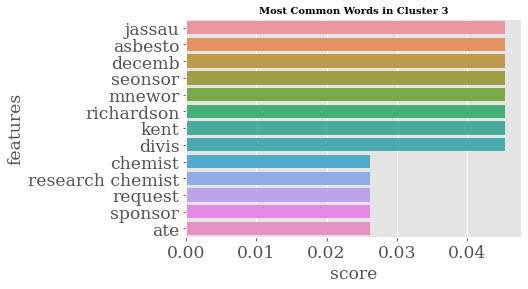

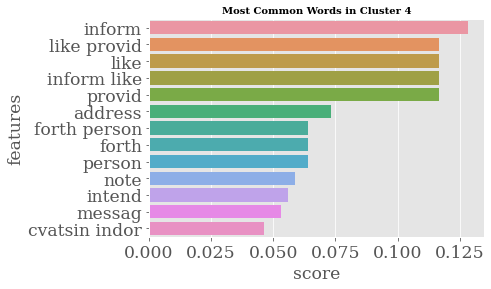

In [91]:
best_result = 5
kmeans = kmeans_results.get(best_result)

final_df_array =  tf_idf.to_numpy()
prediction = kmeans.predict(tf_idf)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 13)

used wordcloud to show and group words in a cluster for better visualization

###Map of Words
Now that we can look at the graphs above and see the best scored words in each cluster, it's also interesting to make it prettier by making a map of words of each cluster!

In [92]:
# Transforms a centroids dataframe into a dictionary to be used on a WordCloud.
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

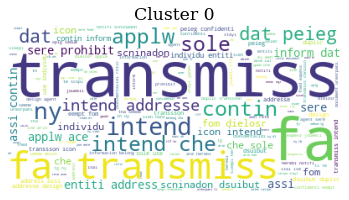

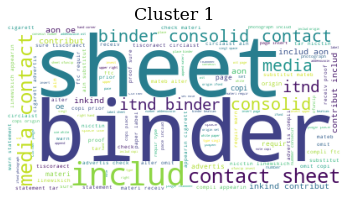

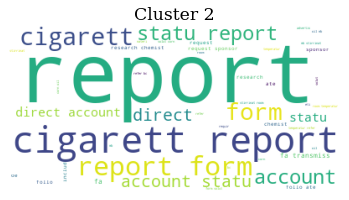

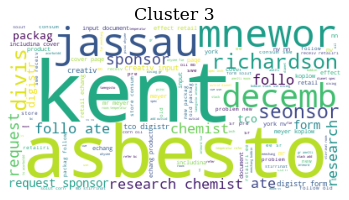

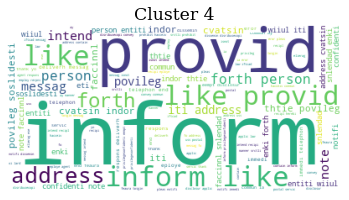

In [93]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = tf_idf.columns
generateWordClouds(centroids)

In [94]:
labels = kmeans.labels_ 
df['label'] = labels
df.head()

,text,label
0,address may contain inform privilegesonfidenti...,4
2,problem new packag follow old packag,3
3,kent mill,3
4,mnewor,3
5,effect retail call could echang product,3


In [95]:
df.to_csv('/content/drive/MyDrive/prodigal/final.csv',index=False)

In [96]:
data=pd.read_csv('/content/drive/MyDrive/prodigal/final.csv')

In [97]:
data.head()

,text,label
0,address may contain inform privilegesonfidenti...,4
1,problem new packag follow old packag,3
2,kent mill,3
3,mnewor,3
4,effect retail call could echang product,3


###some visualization of images in the dataset

#optional just to enjoy!!

In [98]:
import os
import glob
import json
from tqdm.notebook import tqdm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import image
import cv2

import warnings
warnings.filterwarnings('ignore')

In [99]:
plt.style.use('ggplot')
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='xx-large')
plt.rc('ytick', labelsize='xx-large')
plt.rc('axes', labelsize='xx-large', titlesize='xx-large')
plt.rc('legend',fontsize=16)
%matplotlib inline

In [100]:
RED = [0, 0, 225]
GREEN = [0,255, 0]
BLUE = [255,0, 0]
CYAN = [255, 255, 0]
label_to_color = {"question": RED, "answer": GREEN, "header": BLUE, "other": CYAN}

In [101]:
def load_images(img_path, annotations):
    imgs_org = []; imgs_colored = []
    for idx, image_file in tqdm(enumerate(img_path)):
        imgs_org.append(cv2.imread(image_file))
        imgs_colored.append(color_image(cv2.imread(image_file), annotations[idx]))
    return imgs_org, imgs_colored    

In [102]:
def load_annotations(annotations_name):
    annotations = []
    for path in tqdm(annotations_name):
        with open(path) as fp:
            annotations.append(Form(json.loads(fp.read())["form"]))
    return annotations

In [103]:
class Box():
    def __init__(self, xmin, ymin, xmax, ymax):
        self.xmin, self.ymin, self.xmax, self.ymax = xmin, ymin, xmax, ymax
     
    def __repr__(self):
        return f"Box(xmin={self.xmin},ymin={self.ymin}, xmax={self.xmax}, ymax={self.ymax})"

class Word:
    def __init__(self, box, text):
        self.box = Box(*box)
        self.text = text
        
    def __getitem__(self, item):
        if not hasattr(self, item):
            raise KeyError(f"{item} is not present in {self.__class__}")
        return getattr(self, item)
    
    def __repr__(self):
        return f"Word(box={self.box}, text={self.text})"
        
    
class Entity:
    def __init__(self,box, text, label, words, linking, id):
        self.id_ = id
        self.box = Box(*box)
        self.text = text
        self.label = label
        self.words = [ Word(**word) for word in words ] 
        self.linking = linking
    
    def __getitem__(self, item):
        if not hasattr(self, item):
            raise KeyError(f"{item} is not present in {self.__class__}")
        return getattr(self, item)
    
    def __repr__(self):
        return f"Entity(id_={self.id_}, box={self.box}, text={self.text}, label={self.label}, words={self.words}, linking={self.linking})"
    
class Form():
    def __init__(self, entities):
        self.entities = [Entity(**entity) for entity in entities]
        
    def __repr__(self):
        return f"Form(entities={self.entities})"

In [104]:
def color_image(image, annotation):
    for entity in annotation.entities:
        box = entity.box
        image_crop = image[box.ymin:box.ymax, box.xmin:box.xmax, :]
        image_crop[np.where((image_crop < [127,127,127]).all(axis = 2))] = label_to_color[entity.label]
        image[box.ymin:box.ymax, box.xmin:box.xmax, :] = image_crop
        
    return image

In [105]:
import math
import random 
def disp_multi_images(images, suptitle=''):
    len_images = len(images) if len(images)<=25 else 25
    num = math.ceil(math.sqrt(len_images))
    idxs = random.sample(range(0, len(images)), len_images)
    
    fig = plt.figure(figsize=(num**3,num**3)) if num > 3 else  plt.figure(figsize=((num+1)**3,(num+1)**3))
    plt.suptitle(suptitle, size=16, y=3)
    
    for count, index in enumerate(idxs):
        ax = fig.add_subplot(num, num, count + 1, xticks=[], yticks=[])
        image = images[index]
        ax.imshow(image)
        
        if count==len_images-1:
            plt.show()
            break   

In [106]:

train_path = '/content/drive/MyDrive/prodigal/dataset/training_data'
test_path = '/content/drive/MyDrive/prodigal/dataset/testing_data'

train_images_path = sorted(glob.glob("{}/images/*".format(train_path)))
test_images_path = sorted(glob.glob("{}/images/*".format(test_path)))
train_annotations_path = sorted(glob.glob("{}/annotations/*".format(train_path)))
test_annotations_path = sorted(glob.glob("{}/annotations/*".format(test_path)))

print("Total Train images={}. Total Train annotations={}.".format(len(train_images_path), len(train_annotations_path)))
print("Total Test images={}. Total Test annotations={}.".format(len(test_images_path), len(test_annotations_path)))

Total Train images=149. Total Train annotations=149.
Total Test images=50. Total Test annotations=50.


In [107]:
ann_train = load_annotations(train_annotations_path)
img_train_org, img_train_colored = load_images(train_images_path, ann_train)
ann_test = load_annotations(test_annotations_path)
img_test_org, img_test_colored = load_images(test_images_path, ann_test)

  0%|          | 0/149 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

0it [00:00, ?it/s]

In [108]:
from copy import copy

num_train = {"forms": len(ann_train), "words": 0, "entities":0, \
             "question": 0, "header": 0, "answer": 0, "other": 0}
num_test = copy(num_train); num_test['forms'] = len(ann_test)
for annotation in ann_train:
    num_train["entities"] += len(annotation.entities)
    for entity in annotation.entities:
        num_train[entity.label] += 1
        num_train['words'] += len(entity.words)

for annotation in ann_test:
    num_test["entities"] += len(annotation.entities)
    for entity in annotation.entities:
        num_test[entity.label] += 1
        num_test['words'] += len(entity.words)

In [109]:
def mergeDictionary(dict_1, dict_2):
    dict_3 = {**dict_1, **dict_2}
    for key, value in dict_3.items():
        if key in dict_1 and key in dict_2:
            dict_3[key] = [value , dict_1[key]]
    return dict_3

num_label = mergeDictionary(num_train, num_test)
print(pd.DataFrame(num_label, index=['Training', 'Testing']))


          forms  words  entities  question  header  answer  other
Training     50   8973      2332      1077     122     821    312
Testing     149  22512      7411      3266     441    2802    902


Text(0.5, 1.0, 'Colored Image')

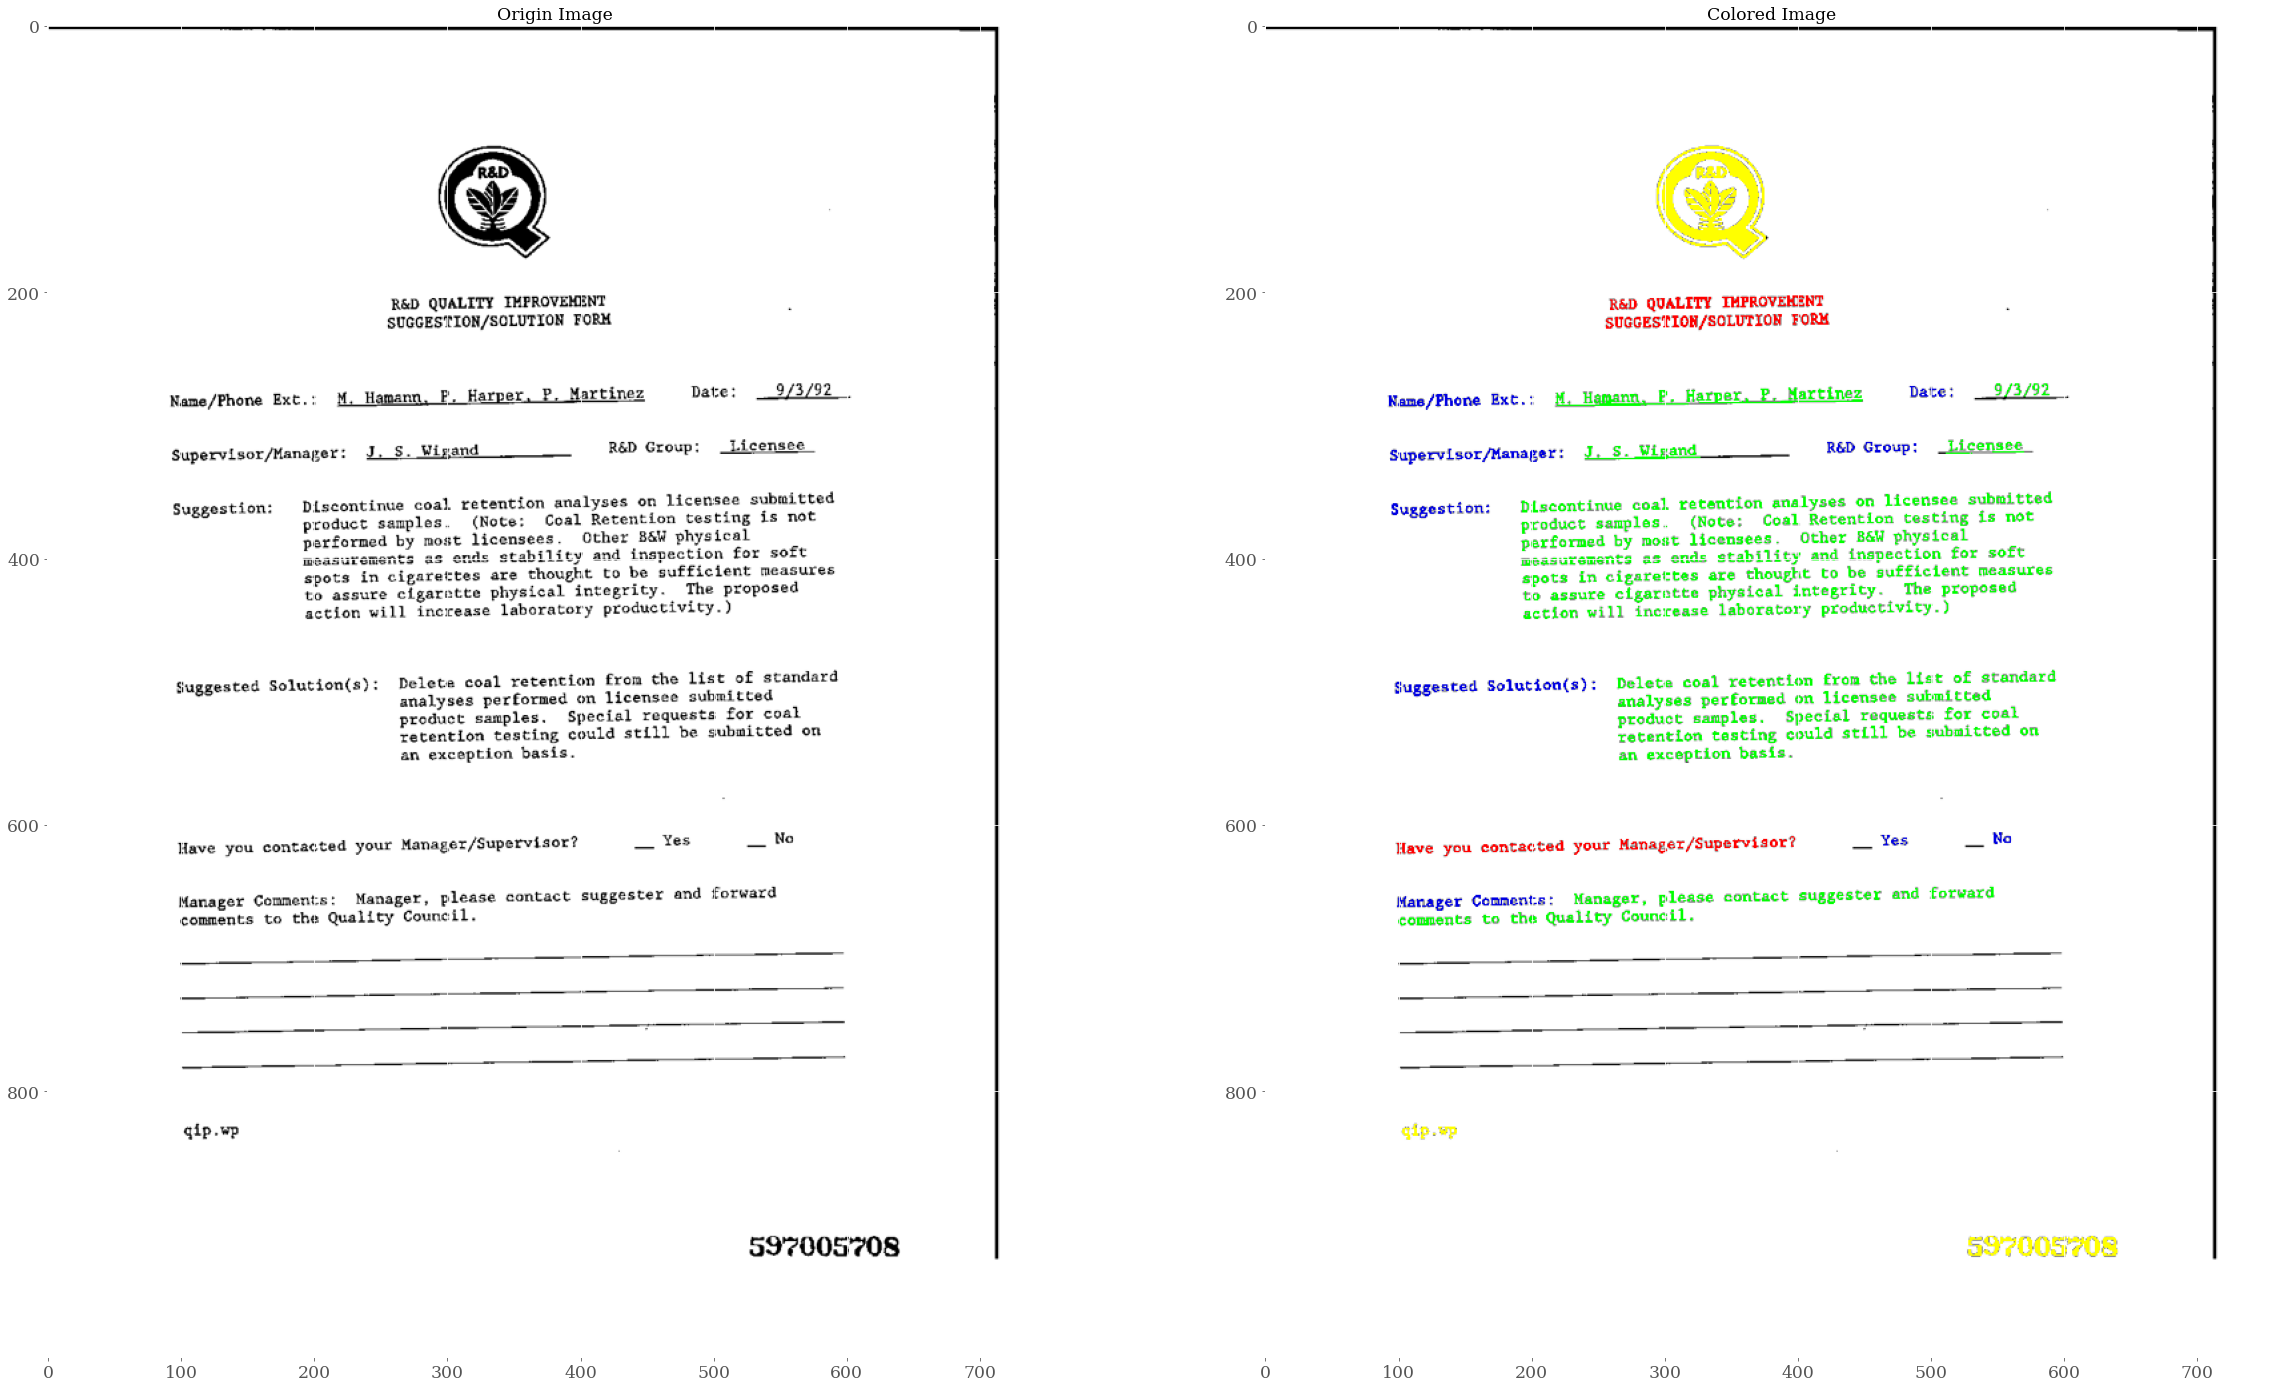

In [110]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(40,40))
axes[0].imshow(img_train_org[0])
axes[0].set_title('Origin Image')
axes[1].imshow(img_train_colored[0])
axes[1].set_title('Colored Image')

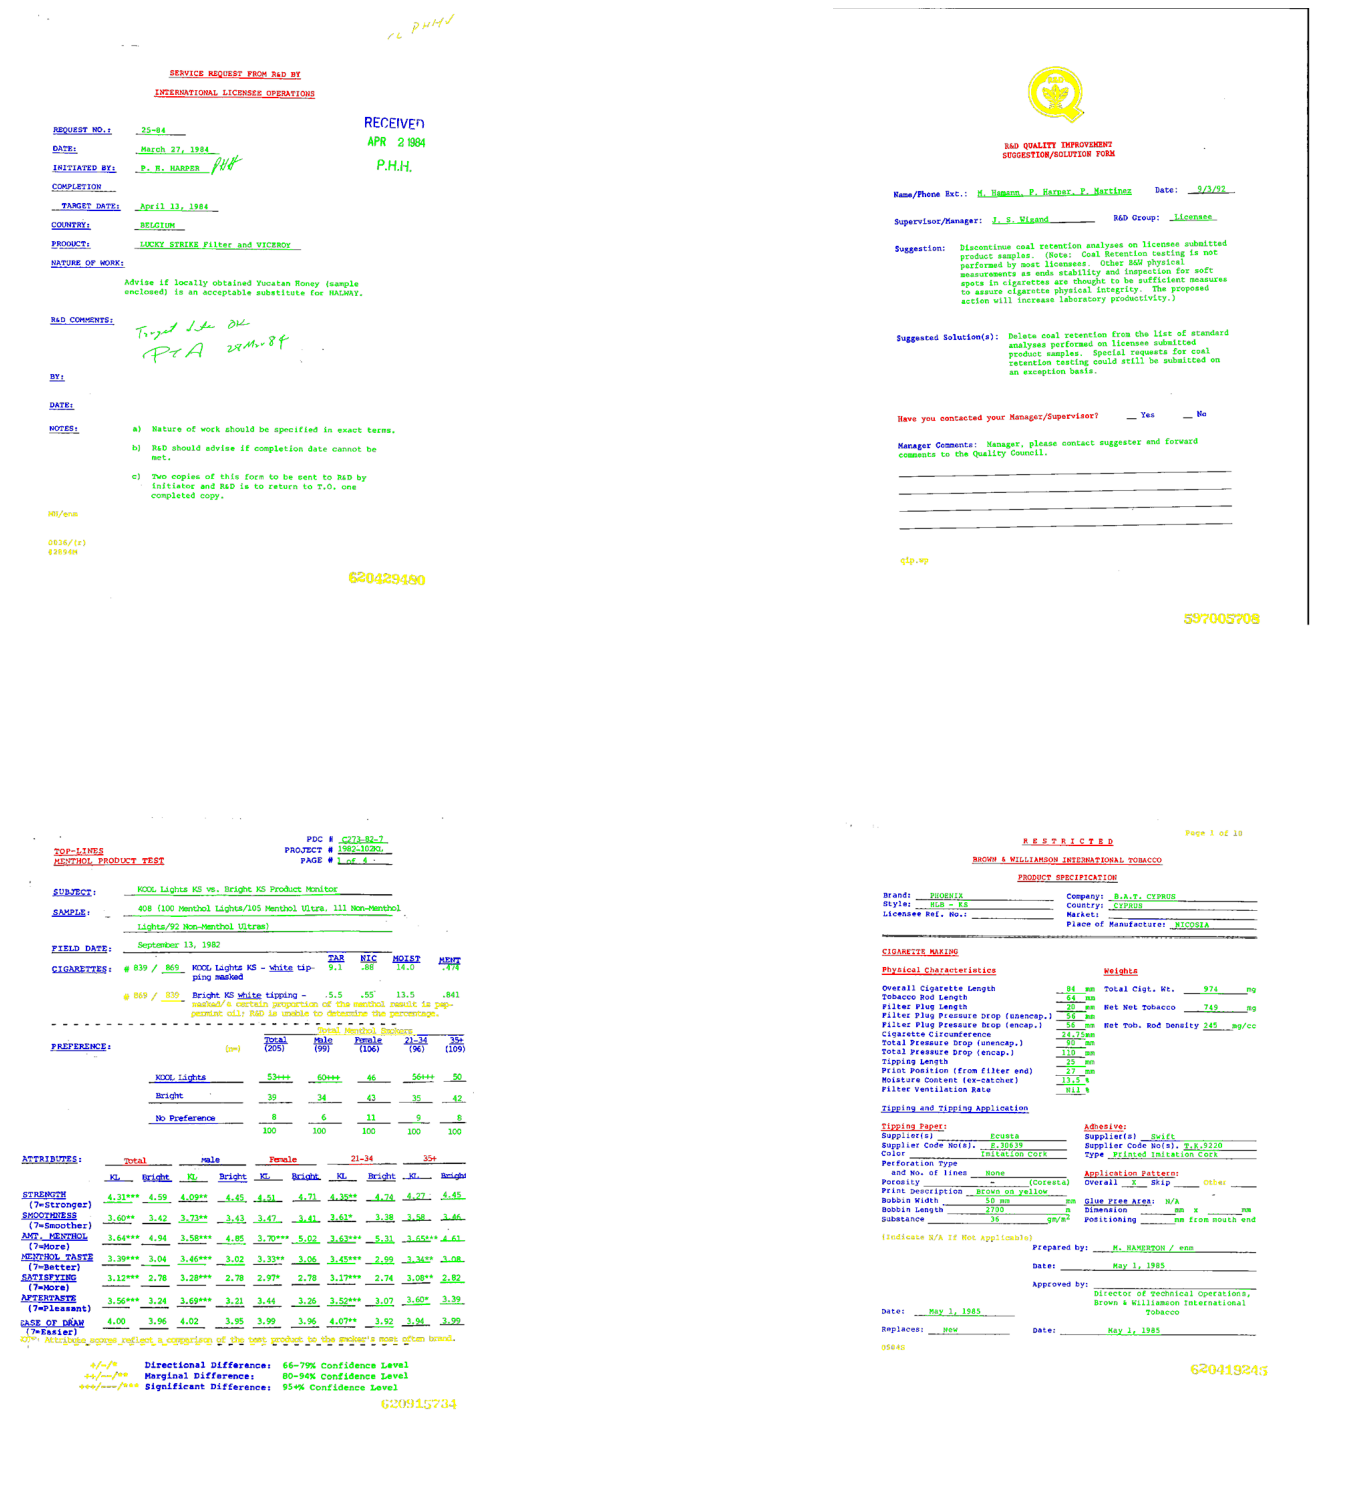

In [111]:
disp_multi_images(img_train_colored[:4])